<a id = '1'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1 | Importing packages</b></p>
</div>

In [1]:
import pandas as pd
import numpy as np
import re


import arabic_reshaper
from bidi.algorithm import get_display
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer as tfid
from sklearn.feature_selection import SelectPercentile, f_classif, chi2

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay


from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

import scikitplot as skplt

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_colwidth", 200)

%matplotlib inline

<a id = '2'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2 | Upload Dataset</b></p>
</div>

In [4]:
SadNews = pd.read_excel("Arabic_sad_news_responses.xlsx")
SadNews.head(3)

,favorite_count,full_text,reply_count,retweet_count,class
0,187,#نجوى_كرم تستجيب لِطلب أمّ و تضيء شمعة نية لشفاء المصابين في #انفجار_بيروت!\n@najwakaram \nhttps://t.co/ENRSBB9s7b https://t.co/tloPk268NE,0,44,1
1,120,السيد حسن: المواقف والأحكام المسبقة بشأن الفاجعة اعتمدت على قلب الحقائق.\n\n#الميادين\n#انفجار_بيروت https://t.co/eoM3ZliYwO,0,19,0
2,33,@Eyaaaad جاء ليذكركم أنكم أمة واحدة.. ورحل... إنا لله وإنا إليه راجعون,0,1,1


In [5]:
SadNews.shape

(2264, 5)

In [6]:
SadNews.drop_duplicates(inplace = True, ignore_index=True)
SadNews.shape

(2096, 5)


<a id = '3'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3 | Pre-processings</b></p>
</div>

In [7]:
df =  SadNews.drop(columns=['favorite_count', 'reply_count', 'retweet_count'], axis=1)
df.shape

(2096, 2)

In [8]:
df.head()

,full_text,class
0,#نجوى_كرم تستجيب لِطلب أمّ و تضيء شمعة نية لشفاء المصابين في #انفجار_بيروت!\n@najwakaram \nhttps://t.co/ENRSBB9s7b https://t.co/tloPk268NE,1
1,السيد حسن: المواقف والأحكام المسبقة بشأن الفاجعة اعتمدت على قلب الحقائق.\n\n#الميادين\n#انفجار_بيروت https://t.co/eoM3ZliYwO,0
2,@Eyaaaad جاء ليذكركم أنكم أمة واحدة.. ورحل... إنا لله وإنا إليه راجعون,1
3,@AJELNEWS24 اللهم انزل فيض لطفك وجبرك علي قلوب ذويهم وارحم موتاهم واغفر لهم وارحمهم رحمة تسع السموات والارض ومابينهما,1
4,ماذا لو قرر الإعلام عدم نقل كلمات الرؤساء والقادة والزعماء؟\nماذا لو طلب منهم الأفعال لا الأقوال؟\nماذا لو أغلق الباب أمام كلماتهم وفتح المجال لأمهات الضحايا ليقولوا كلمتهم؟ \n#انفجار_بيروت #انفجا...,0


In [9]:
#Cleaning

my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•'
    
def preprocess(text_string):
    space_pattern = '\s+'
    new_line = '\n+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    non_word_char = '[^\w]'
    underscore = '_[\w]+'
    
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(new_line, ' ', parsed_text)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text = re.sub(non_word_char, ' ', parsed_text)
    parsed_text = re.sub(r"\bو(.*?)\b", r'\1', parsed_text)
    parsed_text = re.sub('([0-9]+)', '', parsed_text)
    parsed_text = re.sub(underscore, ' ', parsed_text)
    
    return parsed_text

In [10]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [11]:
df['tidy_tweet'] = np.vectorize(preprocess)(df['full_text'])

In [12]:
df['tidy_tweet'] = np.vectorize(deEmojify)(df['tidy_tweet'])

In [13]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [14]:
df['tidy_tweet'] = df['tidy_tweet'].str.strip()

In [15]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [16]:
stopwords = list(map(str.strip,stopwords.open('arabic')))

In [17]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: [item for item in x if item not in stopwords])

In [18]:
df.drop(['full_text'], axis = 1, inplace = True)

In [19]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x]))

In [20]:
df.to_csv('tidy_tweet.csv', index=False)

In [21]:
df.head()

,class,tidy_tweet
0,1,نجوى تستجيب طلب تضيء شمعة نية لشفاء المصابين انفجار
1,0,السيد حسن المواقف الأحكام المسبقة بشأن الفاجعة اعتمدت قلب الحقائق الميادين انفجار
2,1,جاء ليذكركم أنكم أمة احدة رحل لله إليه راجعون
3,1,اللهم انزل فيض لطفك جبرك علي قلوب ذويهم ارحم موتاهم اغفر ارحمهم رحمة السموات الارض مابينهما
4,0,قرر الإعلام عدم نقل كلمات الرؤساء القادة الزعماء طلب منهم الأفعال الأقوال أغلق الباب كلماتهم فتح المجال لأمهات الضحايا ليقولوا كلمتهم انفجار انفجار انفجار انفجار لبنان بيروت


<br>
<br>
<br>
<a id = '4'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4 | Data Visualization</b></p>
</div>


<br>
<a id = '4.1'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.1 | Word clouds</b></p>
</div>

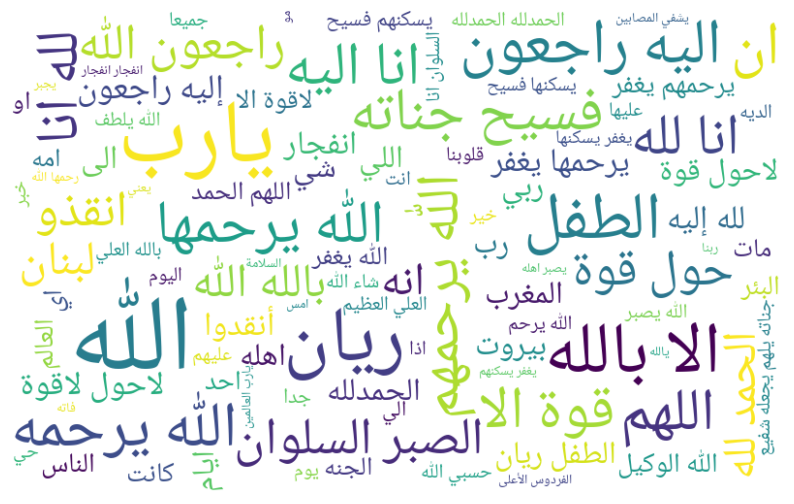

In [22]:
all_words = ' '.join([text for text in df['tidy_tweet']])

all_words = arabic_reshaper.reshape(all_words)
all_words = get_display(all_words)

wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', width=800, height=500, random_state=21,
                      max_font_size=110, background_color = 'white', colormap = 'viridis',
                     max_words = 100).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("Sad News SA.png");

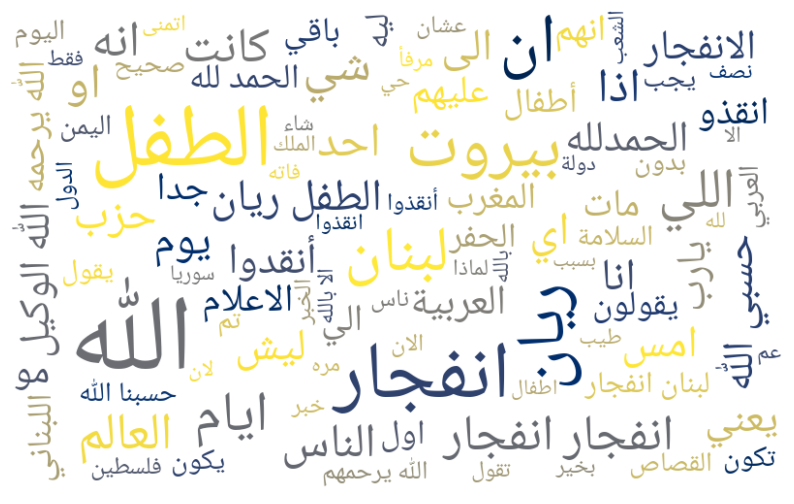

In [23]:
neg_words =' '.join([text for text in df['tidy_tweet'][df['class'] == 0]])

neg_words = arabic_reshaper.reshape(neg_words)
neg_words = get_display(neg_words)

wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', width=800, height=500, random_state=21,
                      max_font_size=110, background_color = 'white', colormap = 'cividis',
                     max_words = 100).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("Sad News SA_Neg.png");

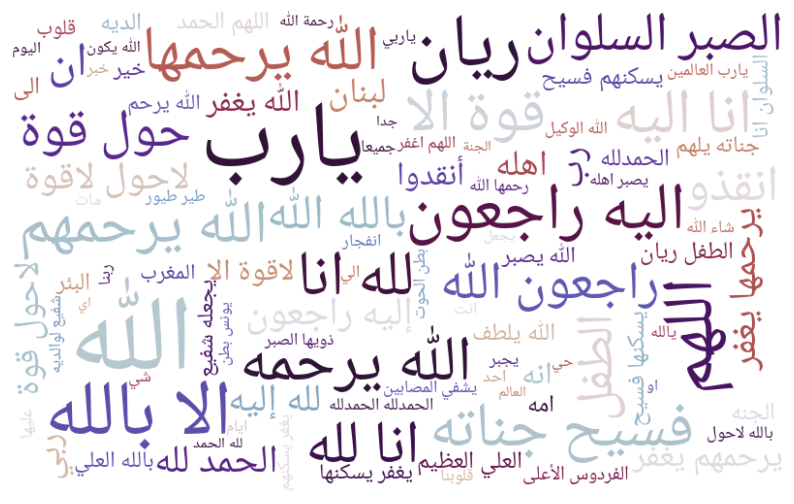

In [24]:
pos_words =' '.join([text for text in df['tidy_tweet'][df['class'] == 1]])

pos_words = arabic_reshaper.reshape(pos_words)
pos_words = get_display(pos_words)

wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', width=800, height=500, random_state=21,
                      max_font_size=110, background_color = 'white', colormap = 'twilight_shifted',
                     max_words = 100).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("Sad News SA_Pos.png");


<br>
<br>
<br>
<a id = '4.2'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.2 | Dataset Analysis</b></p>
</div>

In [31]:
case1 = pd.read_excel('../input/case1.xlsx')
case2 = pd.read_excel('../input/Case2.xlsx')
case3 = pd.read_excel('../input/case3.xlsx')
whole = pd.read_excel('../input/whole_data.xlsx')

case1.head()

,favorite_count,full_text,reply_count,retweet_count,class,category
0,874,هل تشعر الشعوب بالغيرة؟\nهل هو شعور حميد؟\nتتحدث عن غزة \nيسألونك لماذا لا تتحدث عن سوريا \nتتحدث عن سوريا \nيسألونك لماذا لا تتحدث عن اليمن..\nتتحدث عن اليمن \nيسألونك لماذا لا تتحدث عن العراق..\...,NaN,NaN,0,0
1,45,لايمكن أبدا المقارنة بين حوادث السقوط في الآبار لمجرد الإنتقاد لفرق الإنقاذ، لأنه ببساطة كل حالة لها خصوصياتها، فالجزائر التي فشلت في إنقاذ #عياش نجحت في إنقاذ عجوز القلتة الزرقاء هنا بسطيف سنة 2...,NaN,NaN,0,0
2,0,@AJELNEWS24 دوله كامله لمده ٥ايام ماقدرو يطلعونه لحول ولا قوه الا بالله الله يرحمه ويغفرله ويصبر اهله يارب,3,0,0,1
3,0,@AJELNEWS24 اجزت رمضان,0,0,0,1
4,3,@AJELNEWS24 @GFJWT1 بعد أن انتقل ريان إلى جوار رب كريم ...وجهوا كاميراتكم وقلوبكم إلى أطفال #اليمن و#سوريا و #العراق و #فلسطين ... #انقذوا_فواز_قطيفان \n\nكل الأطفال يستحقون الحياة ❤,0,1,0,1


In [26]:
#case2.head()

In [27]:
#case3.head()

In [28]:
#whole.head()

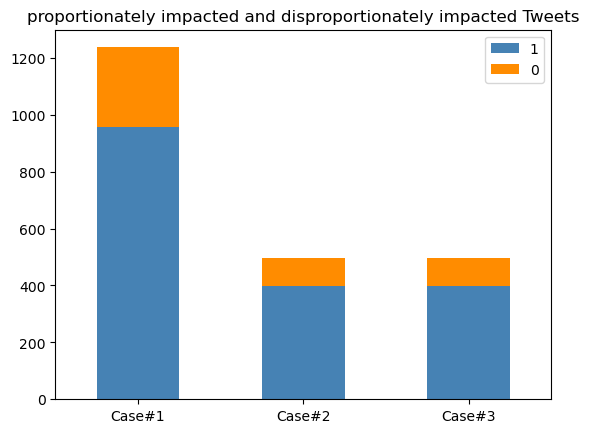

In [29]:
#Stacked barplot

case1 = whole.loc[whole['case']==1, :]['class'].value_counts()
case2 = whole.loc[whole['case']==2, :]['class'].value_counts()
case3 = whole.loc[whole['case']==3, :]['class'].value_counts()
df_plot  = pd.DataFrame([case1,case3,case3])
df_plot.index=['Case#1','Case#2','Case#3']

# Plot
df_plot.plot(kind='bar',stacked=True, color=['steelblue','darkorange'], title='proportionately impacted and disproportionately impacted Tweets');
plt.xticks(rotation=0, horizontalalignment="center")
plt.savefig("whole-.png");

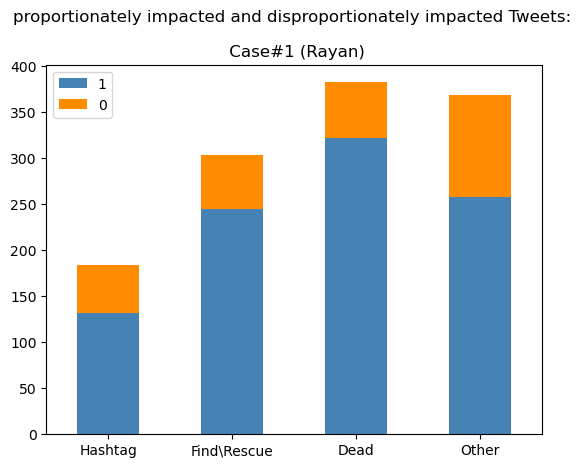

In [32]:
#case1

tag = case1.loc[case1['category']==0, :]['class'].value_counts()
find = case1.loc[case1['category']==1, :]['class'].value_counts()
dead = case1.loc[case1['category']==2, :]['class'].value_counts()
other = case1.loc[case1['category']==3, :]['class'].value_counts()
df_plot  = pd.DataFrame([tag,find,dead,other])
df_plot.index=['Hashtag','Find\Rescue','Dead', 'Other']

# Plot
df_plot.plot(kind='bar',stacked=True, color=['steelblue','darkorange'], title='proportionately impacted and disproportionately impacted Tweets: \n\n Case#1 (Rayan)');
plt.xticks(rotation=0, horizontalalignment="center")
plt.savefig("Case#1-.png");

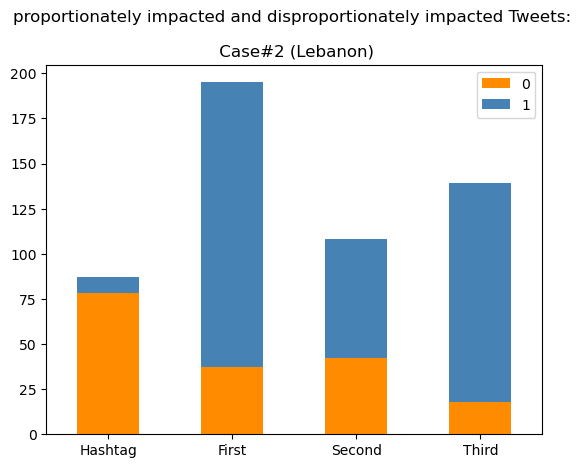

In [33]:
#case2

tag2 = case2.loc[case2['category']==0, :]['Class'].value_counts()
find2 = case2.loc[case2['category']==1, :]['Class'].value_counts()
dead2 = case2.loc[case2['category']==2, :]['Class'].value_counts()
other2 = case2.loc[case2['category']==3, :]['Class'].value_counts()
df_plot  = pd.DataFrame([tag2,find2,dead2,other2])
df_plot.index=[ 'Hashtag','First','Second', 'Third']

# Plot
df_plot.plot(kind='bar',stacked=True, color=['darkorange','steelblue'], title='proportionately impacted and disproportionately impacted Tweets: \n\n Case#2 (Lebanon)');
plt.xticks(rotation=0, horizontalalignment="center")
plt.savefig("Case#2-.png");

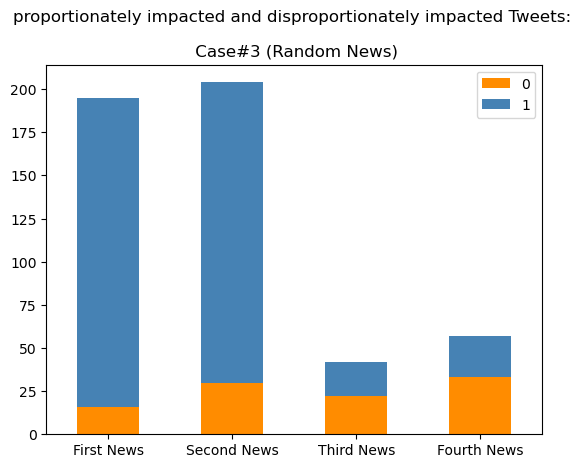

In [34]:
#case3

tag3 = case3.loc[case3['category']==1, :]['class'].value_counts()
find3 = case3.loc[case3['category']==2, :]['class'].value_counts()
dead3 = case3.loc[case3['category']==3, :]['class'].value_counts()
other3 = case3.loc[case3['category']==4, :]['class'].value_counts()
df_plot  = pd.DataFrame([tag3,find3,dead3,other3])
df_plot.index=['First News','Second News', 'Third News', 'Fourth News']

# Plot
df_plot.plot(kind='bar',stacked=True, color=['darkorange','steelblue'], title='proportionately impacted and disproportionately impacted Tweets: \n\n Case#3 (Random News)');
plt.xticks(rotation=0, horizontalalignment="center")
plt.savefig("Case#3.png");


<br>
<br>
<br>
<a id = '5'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5 | ML Models</b></p>
</div>


<br>
<a id = '5.1'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.1 | TF-IDF Feature Extracting</b></p>
</div>

In [35]:
# using TfIdf to make words as features by making word vectors

tfidf = tfid(max_features=9000)
features_tfidf = tfidf.fit_transform(df['tidy_tweet'])
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
features_tfidf

(2096, 7397)
Sparse Matrix :
   (0, 2252)	0.18765366353417431
  (0, 1952)	0.23752527701736498
  (0, 5562)	0.36459839945876865
  (0, 6595)	0.36459839945876865
  (0, 4362)	0.36459839945876865
  (0, 3138)	0.36459839945876865
  (0, 4554)	0.33283011884841773
  (0, 3084)	0.36459839945876865
  (0, 6464)	0.36459839945876865
  (1, 2061)	0.29290401344618366
  (1, 1238)	0.3141608102629766
  (1, 5159)	0.20055712370345996
  (1, 673)	0.33103327910236774
  (1, 1675)	0.29290401344618366
  (1, 2665)	0.33103327910236774
  (1, 1917)	0.33103327910236774
  (1, 787)	0.33103327910236774
  (1, 2049)	0.27890251932453114
  (1, 3626)	0.24197950126609147
  (1, 1463)	0.29290401344618366
  (1, 2252)	0.17037816860278088
  (2, 3952)	0.20140960974895591
  (2, 322)	0.26336867761873706
  (2, 5696)	0.18274757798457797
  (2, 3988)	0.37581063607635173
  :	:
  (2094, 4227)	0.4424400505206053
  (2094, 2158)	0.4306149195013594
  (2094, 4979)	0.45664477511831725
  (2095, 6135)	0.20704526162028314
  (2095, 5085)	0.2070452616202

,awful,beirut,beirutblast,beirutexplosion,cash,cnn,elissianmagazine,epa,flow,ifb,...,٥أيام,٥ايام,٥٨,٦٠,٨الليل,٨٥,چان,چنه,گلبها,گمان
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
target = df['class']

final_df = pd.concat([pd.DataFrame(features_tfidf)], axis=1)
final_df.head()

,awful,beirut,beirutblast,beirutexplosion,cash,cnn,elissianmagazine,epa,flow,ifb,...,٥أيام,٥ايام,٥٨,٦٠,٨الليل,٨٥,چان,چنه,گلبها,گمان
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'BoW_Sentiment_Model.pkl'
pickle.dump(features_tfidf, open(bow_path, "wb"))


<br>
<br>
<br>
<a id = '5.2'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.2 | Splitting Data</b></p>
</div>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(final_df,target,test_size=0.20)


<br>
<br>
<br>
<a id = '5.3'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.3 | Logistic Regression (LR)</b></p>
</div>

In [39]:
#LR

lr = LogisticRegression(random_state = 42, max_iter=1000)    
    


# create and fit the model
lr.fit(X_train,y_train)

# make prediction and print accuracy
prediction = lr.predict(X_test)
print(f"LR F1 score score is {f1_score(y_test, prediction):.2f}")
print(f"LR recall score is {recall_score(y_test, prediction):.2f}")
print(f"LR precision score is {precision_score(y_test, prediction):.2f}")
print(f"LR Accuracy score is {accuracy_score(y_test, prediction):.2f}")


LR F1 score score is 0.88
LR recall score is 0.98
LR precision score is 0.79
LR Accuracy score is 0.79


              precision    recall  f1-score   support

           0       0.81      0.24      0.36       106
           1       0.79      0.98      0.88       314

    accuracy                           0.79       420
   macro avg       0.80      0.61      0.62       420
weighted avg       0.80      0.79      0.75       420



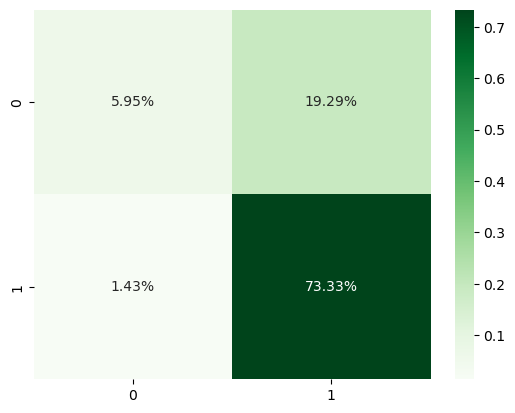

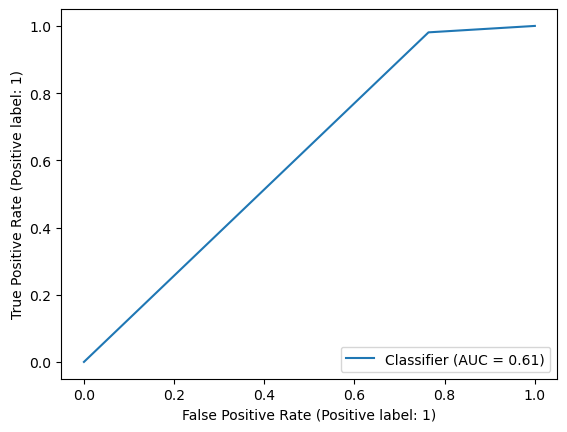

In [40]:

print(classification_report(y_test, prediction))


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Greens')

plt.savefig("Sad News SA_LR.png");

RocCurveDisplay.from_predictions(
    y_test, prediction)


<br>
<br>
<br>
<a id = '5.4'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.4 | Naive Bayes (NB)    with 3-Fold</b></p>
</div>

In [41]:
#NB

nb = MultinomialNB()    
    
k_fold = KFold(n_splits=3)
cross_val_score(nb, final_df, target, cv=k_fold, scoring='f1')

# create and fit the model
nb.fit(X_train,y_train)

# make prediction and print accuracy
prediction = nb.predict(X_test)
print(f"NB F1 score score is {f1_score(y_test, prediction):.2f}")
print(f"NB recall score is {recall_score(y_test, prediction):.2f}")
print(f"NB precision score is {precision_score(y_test, prediction):.2f}")
print(f"NB Accuracy score is {accuracy_score(y_test, prediction):.2f}")


NB F1 score score is 0.87
NB recall score is 0.98
NB precision score is 0.78
NB Accuracy score is 0.78


              precision    recall  f1-score   support

           0       0.77      0.16      0.27       106
           1       0.78      0.98      0.87       314

    accuracy                           0.78       420
   macro avg       0.77      0.57      0.57       420
weighted avg       0.78      0.78      0.72       420



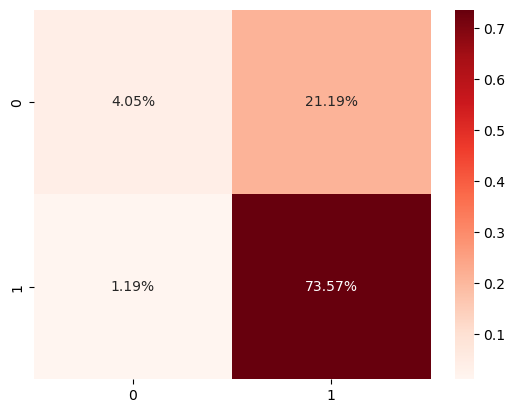

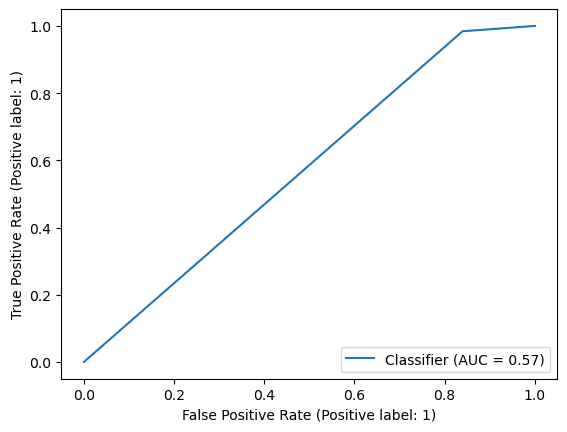

In [42]:
print(classification_report(y_test, prediction))


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

plt.savefig("Sad News SA_NB.png");

RocCurveDisplay.from_predictions(
    y_test, prediction)


<br>
<br>
<br>
<a id = '5.5'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.5 | Support Vector Machine (SVM)</b></p>
</div>


<br>
<a id = '5.5.1'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.5.1 | Select SVM Parameters</b></p>
</div>

In [44]:
param_grid = {'C': [1,3], 'gamma': [1,0.1,0.3], 'kernel': ['linear', 'rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print(grid.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  10.7s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  14.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  20.8s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  19.3s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  21.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  38.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  33.7s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  40.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  40.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  54.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  34.7s
[CV] END ......................C=1, gamma=0.1, k

<br>
<br>
<br>
<a id = '5.5.2'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.5.2 | SVM Model with 3-Fold</b></p>
</div>

In [45]:
#SVM


svc_model = SVC(kernel='linear', gamma=0.3, C=3, probability=True, max_iter=1000)


k_fold = KFold(n_splits=3)
cross_val_score(svc_model, final_df, target, cv=k_fold, scoring='f1')

# create and fit the model
svc_model.fit(X_train,y_train)

prediction = svc_model.predict(X_test)
print(f"SVM F1 score score is {f1_score(y_test, prediction):.2f}")
print(f"SVM recall score is {recall_score(y_test, prediction):.2f}")
print(f"SVM precision score is {precision_score(y_test, prediction):.2f}")
print(f"SVM Accuracy score is {accuracy_score(y_test, prediction):.2f}")


SVM F1 score score is 0.89
SVM recall score is 0.92
SVM precision score is 0.86
SVM Accuracy score is 0.83


              precision    recall  f1-score   support

           0       0.70      0.56      0.62       106
           1       0.86      0.92      0.89       314

    accuracy                           0.83       420
   macro avg       0.78      0.74      0.76       420
weighted avg       0.82      0.83      0.82       420



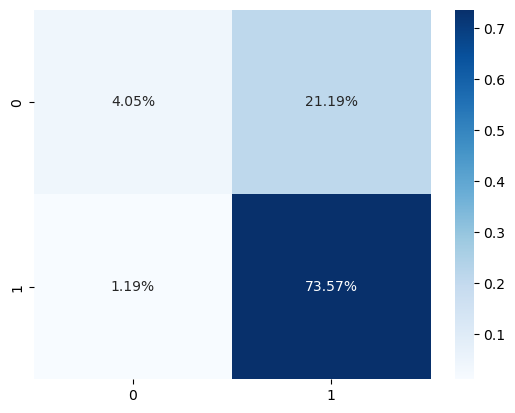

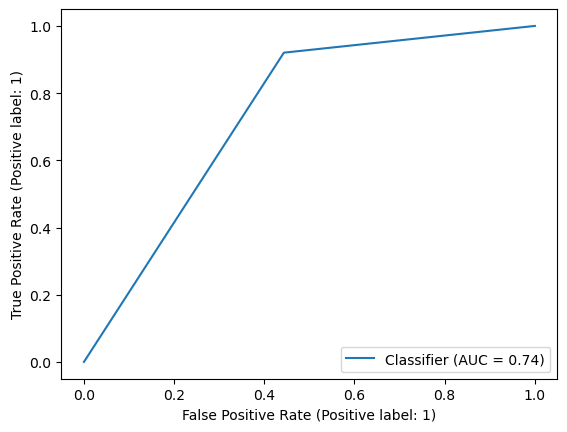

In [46]:
print(classification_report(y_test, prediction))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

plt.savefig("Sad News SA_SVM.png");

RocCurveDisplay.from_predictions(
    y_test, prediction)


<br>
<br>
<br>
<a id = '5.6'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.6 | Models Perfomance</b></p>
</div>

In [47]:
lr_probas = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)
nb_probas = MultinomialNB().fit(X_train, y_train).predict_proba(X_test)
svm_probas = svc_model.fit(X_train, y_train).predict_proba(X_test)


probas_list = [lr_probas, nb_probas, svm_probas]
clf_names = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine']

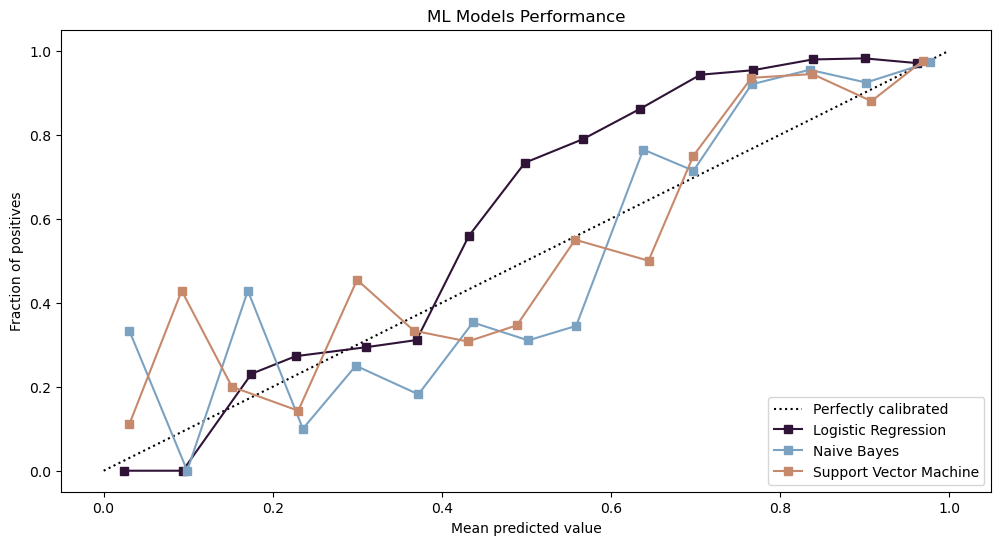

In [48]:
skplt.metrics.plot_calibration_curve(y_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     cmap = 'twilight_shifted',
                                     figsize=(12,6),
                                     title="ML Models Performance"
                                     );

<br>
<br>
<br>
<a id = '5.5.3'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.5.3 | Export SVM Classifier</b></p>
</div>

In [49]:
# Exporting SVM Classifier to later use in prediction
import joblib
joblib.dump(svc_model, 'svm_3fold_Sentiment_Model') 

['svm_3fold_Sentiment_Model']

<br>
<br>
<br>
<a id = '6'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>6 | Evaluation</b></p>
</div>